In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
from cython_folder.TTM_test.ttm_test import TTM
from cython_folder.CTTM_test.cttm_test import CTTM
from cython_folder.SCTTM_test.scttm_test import SCTTM

In [2]:
N_tdv = pd.read_pickle('../pickle_folder/q30/questions_bow_arr.pkl')
ttm_eta_tk = pd.read_pickle('../pickle_folder/ttm_train/q30_ttm_eta_tk.pkl')
#cttm_eta_tk = pd.read_pickle('../pickle_folder/cttm_train/q30_cttm_eta_tk.pkl')
scttm_eta_tk = pd.read_pickle('../pickle_folder/scttm_train_af/q30_scttm_eta_tk.pkl')

scttm_sigma_t = pd.read_pickle('../pickle_folder/scttm_train_af/q30_scttm_sigma_t.pkl')

Sex_ds = pd.read_pickle('../pickle_folder/auxiliary/children_sex_count.pkl')
Con_ds = pd.read_pickle('../pickle_folder/auxiliary/additional_info.pkl')
Q_tds = pd.read_pickle('../pickle_folder/auxiliary/questions_meta_arr.pkl')
Q_td = Q_tds[:, :, 2].astype('uint32')
Age_td = Q_tds[:, :, 1]
#for t in range(Age_td.shape[0]):
#    Age_td[t] = np.log1p(Age_td[t] - np.min(Age_td[t]))

In [3]:
# テスト
# k: トピック数, L: 依存時間数, N: 時刻毎のBOW行列
ttm_test = TTM(K=25, L=1, N_tdv=N_tdv[0:1, 550:, :], Age_td=Age_td[0:1, 550:], eta_tk=ttm_eta_tk)
# ttm_estimateの引数: 反復数
ttm_test.ttm_estimate(100)

100%|██████████| 100/100 [00:10<00:00,  9.10it/s]


In [4]:
print(np.array(ttm_test.mse_t))
print(np.array(ttm_test.r_score_t))

[777.60462305]
[-0.14482373]


In [4]:
#pd.to_pickle(np.array(ttm_test.z_tdk_var[0]), '../pickle_folder/ttm_test/q30_ttm_z_tdk_var.pkl')

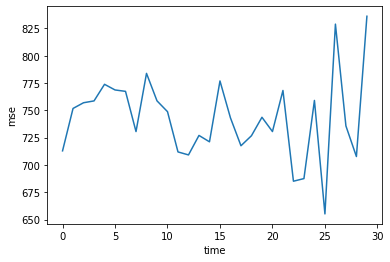

In [14]:
plt.plot(range(len(ttm_test.mse_t)), ttm_test.mse_t)
plt.ylabel("mse")
plt.xlabel("time")
#plt.savefig("../images/mse_time_q30_scttm.png")
plt.show()

In [10]:
# テストデータ保存
"""
pd.to_pickle(np.array(ttm_test.theta_tdk), '../pickle_folder/ttm_test/q30_theta.pkl')
pd.to_pickle(np.array(ttm_test.phi_tkv), '../pickle_folder/ttm_test/q30_phi.pkl')
pd.to_pickle(np.array(ttm_test.alpha_tdl), '../pickle_folder/ttm_test/q30_alpha.pkl')
pd.to_pickle(np.array(ttm_test.beta_tkl), '../pickle_folder/ttm_test/q30_beta.pkl')
pd.to_pickle(np.array(ttm_test.r_score_t), '../pickle_folder/ttm_test/q30_ttm_r_score_t.pkl')
pd.to_pickle(np.array(ttm_test.mse_t), '../pickle_folder/ttm_test/q30_ttm_mse_t.pkl')
pd.to_pickle(np.array(ttm_test.r_score), '../pickle_folder/ttm_test/q30_ttm_r_score.pkl')
pd.to_pickle(np.array(ttm_test.mse_list), '../pickle_folder/ttm_test/q30_ttm_mse_list.pkl')
pd.to_pickle(np.array(ttm_test.eta_tk), '../pickle_folder/ttm_test/q30_ttm_eta_tk.pkl')

In [6]:
# テスト
# k: トピック数, L: 依存時間数, N: 時刻毎のBOW行列
cttm = CTTM(K=20, L=1, N_tdv=N_tdv[0:1, 550:, :], Sex_ds=Sex_ds[550:, :], Con_ds=Con_ds[550:,
            :], Q_td=Q_td[0:1, 550:], Age_td=Age_td[0:1, 550:], eta_tk=cttm_eta_tk)
# ttm_estimateの引数: 反復数
cttm.cttm_estimate(100)

100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


In [12]:
#pd.to_pickle(np.array(cttm.z_tdk_var[0]), '../pickle_folder/cttm_test/q30_cttm_z_tdk_var.pkl')

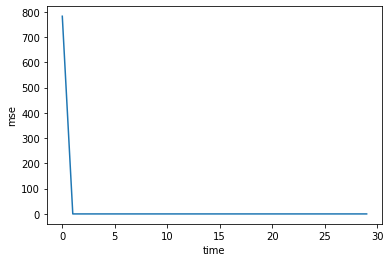

In [16]:
plt.plot(range(len(cttm.mse_t)), cttm.mse_t)
plt.ylabel("mse")
plt.xlabel("time")
#plt.savefig("../images/mse_time_q30_scttm.png")
plt.show()

In [8]:
# テストデータ保存
"""
pd.to_pickle(np.array(cttm.theta_tdk), '../pickle_folder/cttm_test/q30_cttm_theta.pkl')
pd.to_pickle(np.array(cttm.phi_tkv), '../pickle_folder/cttm_test/q30_cttm_phi.pkl')
pd.to_pickle(np.array(cttm.psi_sex_tks), '../pickle_folder/cttm_test/q30_cttm_psi_sex.pkl')
pd.to_pickle(np.array(cttm.psi_chi_tks), '../pickle_folder/cttm_test/q30_cttm_psi_chi.pkl')
pd.to_pickle(np.array(cttm.psi_gen_tks), '../pickle_folder/cttm_test/q30_cttm_psi_gen.pkl')
pd.to_pickle(np.array(cttm.psi_pre_tks), '../pickle_folder/cttm_test/q30_cttm_psi_pre.pkl')
pd.to_pickle(np.array(cttm.psi_q_tks), '../pickle_folder/cttm_test/q30_cttm_psi_q.pkl')
pd.to_pickle(np.array(cttm.alpha_tdl), '../pickle_folder/cttm_test/q30_cttm_alpha.pkl')
pd.to_pickle(np.array(cttm.beta_tkl), '../pickle_folder/cttm_test/q30_cttm_beta.pkl')
pd.to_pickle(np.array(cttm.gamma_sex_t), '../pickle_folder/cttm_test/q30_cttm_gamma_sex_t.pkl')
pd.to_pickle(np.array(cttm.gamma_chi_t), '../pickle_folder/cttm_test/q30_cttm_gamma_chi_t.pkl')
pd.to_pickle(np.array(cttm.gamma_gen_t), '../pickle_folder/cttm_test/q30_cttm_gamma_gen_t.pkl')
pd.to_pickle(np.array(cttm.gamma_pre_t), '../pickle_folder/cttm_test/q30_cttm_gamma_pre_t.pkl')
pd.to_pickle(np.array(cttm.gamma_q_t), '../pickle_folder/cttm_test/q30_cttm_gamma_q_t.pkl')
pd.to_pickle(np.array(cttm.eta_tk), '../pickle_folder/cttm_test/q30_cttm_eta_tk.pkl')
pd.to_pickle(np.array(cttm.r_score_t), '../pickle_folder/cttm_test/q30_cttm_r_score_t.pkl')
pd.to_pickle(np.array(cttm.mse_t), '../pickle_folder/cttm_test/q30_cttm_mse_t.pkl')
pd.to_pickle(np.array(cttm.r_score), '../pickle_folder/cttm_test/q30_cttm_r_score.pkl')
pd.to_pickle(np.array(cttm.mse_list), '../pickle_folder/cttm_test/q30_cttm_mse_list.pkl')

In [3]:
# テスト
# k: トピック数, L: 依存時間数, N: 時刻毎のBOW行列
scttm = SCTTM(K=25, L=1, N_tdv=N_tdv[0:1, 550:, :], Sex_ds=Sex_ds[550:, :], Con_ds=Con_ds[550:,
            :], Q_td=Q_td[0:1, 550:], Age_td=Age_td[0:1, 550:], eta_tk=scttm_eta_tk, sigma_t=scttm_sigma_t)
# ttm_estimateの引数: 反復数
scttm.scttm_estimate(100)

100%|██████████| 100/100 [00:42<00:00,  2.34it/s]


In [4]:
print(np.array(scttm.mse_t))
print(np.array(scttm.r_score_t))

[69.10427461]
[0.89826165]


In [5]:
# テストデータ保存
"""
pd.to_pickle(np.array(scttm.theta_tdk), '../pickle_folder/scttm_test/q30_scttm_theta.pkl')
pd.to_pickle(np.array(scttm.phi_tkv), '../pickle_folder/scttm_test/q30_scttm_phi.pkl')
pd.to_pickle(np.array(scttm.psi_sex_tks), '../pickle_folder/scttm_test/q30_scttm_psi_sex.pkl')
pd.to_pickle(np.array(scttm.psi_chi_tks), '../pickle_folder/scttm_test/q30_scttm_psi_chi.pkl')
pd.to_pickle(np.array(scttm.psi_gen_tks), '../pickle_folder/scttm_test/q30_scttm_psi_gen.pkl')
pd.to_pickle(np.array(scttm.psi_pre_tks), '../pickle_folder/scttm_test/q30_scttm_psi_pre.pkl')
pd.to_pickle(np.array(scttm.psi_q_tks), '../pickle_folder/scttm_test/q30_scttm_psi_q.pkl')
pd.to_pickle(np.array(scttm.alpha_tdl), '../pickle_folder/scttm_test/q30_scttm_alpha.pkl')
pd.to_pickle(np.array(scttm.beta_tkl), '../pickle_folder/scttm_test/q30_scttm_beta.pkl')
pd.to_pickle(np.array(scttm.gamma_sex_t), '../pickle_folder/scttm_test/q30_scttm_gamma_sex_t.pkl')
pd.to_pickle(np.array(scttm.gamma_chi_t), '../pickle_folder/scttm_test/q30_scttm_gamma_chi_t.pkl')
pd.to_pickle(np.array(scttm.gamma_gen_t), '../pickle_folder/scttm_test/q30_scttm_gamma_gen_t.pkl')
pd.to_pickle(np.array(scttm.gamma_pre_t), '../pickle_folder/scttm_test/q30_scttm_gamma_pre_t.pkl')
pd.to_pickle(np.array(scttm.gamma_q_t), '../pickle_folder/scttm_test/q30_scttm_gamma_q_t.pkl')
pd.to_pickle(np.array(scttm.eta_tk), '../pickle_folder/scttm_test/q30_scttm_eta_tk.pkl')
pd.to_pickle(np.array(scttm.r_score_t), '../pickle_folder/scttm_test/q30_scttm_r_score_t.pkl')
pd.to_pickle(np.array(scttm.mse_t), '../pickle_folder/scttm_test/q30_scttm_mse_t.pkl')
pd.to_pickle(np.array(scttm.r_score), '../pickle_folder/scttm_test/q30_scttm_r_score.pkl')
pd.to_pickle(np.array(scttm.mse_list), '../pickle_folder/scttm_test/q30_scttm_mse_list.pkl')